In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from functools import partial
from ipywidgets import interact
%matplotlib inline

## Plot Decision Boundary

In [2]:
#--------  plot_decision_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      pred (classifier prediction function)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_decision_boundary(x, y, pred, title, ax):
    # Create mesh
    # Interval of points for biomarker 1
    min0 = np.min(x[:,0])
    max0 = np.max(x[:,0])
    interval0 = np.arange(min0, max0, (max0-min0)/500.0)
    n0 = np.size(interval0)
    
    # Interval of points for biomarker 2
    min1 = np.min(x[:,1])
    max1 = np.max(x[:,1])
    interval1 = np.arange(min1, max1, (max1-min1)/500.0)
    n1 = np.size(interval1)

    # Create mesh grid of points
    x1, x2 = np.meshgrid(interval0, interval1)
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh of points
    yy = pred(xx)
    yy = yy.reshape((n0, n1))

    # Plot decision surface
    x1 = x1.reshape(n0, n1)
    x2 = x2.reshape(n0, n1)
    ax.contourf(x1, x2, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    
    if(y != None):
        # Plot scatter plot of data
        yy = y.reshape(-1,)
        ax.scatter(x[yy==0,0], x[yy==0,1], c='red', cmap=plt.cm.coolwarm)
        ax.scatter(x[yy==1,0], x[yy==1,1], c='blue', cmap=plt.cm.coolwarm)
    
    # Label axis, title
    ax.set_title(title)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    
    return ax

# Example: Learning XOR

## Generate data

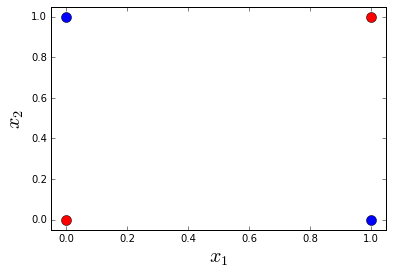

In [15]:
X = np.array([[0., 0.], [1., 1.], [1.0,0.0], [0.0,1.0]])
y = np.array([0, 0, 1, 1])

plt.plot(X[y==0,0], X[y==0,1], 'ro', markersize=10)
plt.plot(X[y==1,0], X[y==1,1], 'o', markersize=10)

plt.xlim(X[:,0].min()-0.05, X[:,0].max()+0.05)
plt.ylim(X[:,1].min()-0.05, X[:,1].max()+0.05)

plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20)

## 2-layer neural net for learning XOR

In [11]:
W = np.array([[1,1],[1,1]]) # Hidden layer
c = np.array([0,-1])

w = np.array([1,-2]) # Output layer
b = np.array([0,0])

$$\mathbf{h} = \sigma(\mathbf{W}^\top \mathbf{x} + \mathbf{c})$$
$$\mathbf{y} = \sigma(\mathbf{w}^\top \mathbf{x} + \mathbf{b}),$$
<center>where $\mathbf{W} \in \mathbb{R}^{2\times2}$, $\mathbf{c} \in \mathbb{R}^2$, $\mathbf{w} \in \mathbb{R}^2$, $\mathbf{b} \in \mathbb{R}$.</center>
<img src = 'xor-mlp.png' height=10% width=10%>

## Compute hidden layer

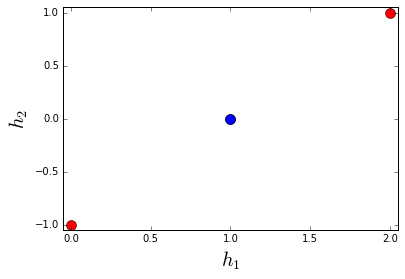

In [28]:
# Compute hidden layer values
h = np.dot(X, W.T) + c

# Plot transformed points
plt.plot(h[y==0,0], h[y==0,1], 'ro', markersize=10)
plt.plot(h[y==1,0], h[y==1,1], 'o', markersize=10)

plt.xlim(h[:,0].min()-0.05, h[:,0].max()+0.05)
plt.ylim(h[:,1].min()-0.05, h[:,1].max()+0.05)

plt.xlabel('$h_1$', fontsize=20)
plt.ylabel('$h_2$', fontsize=20)

## Apply activation function / Output Layer

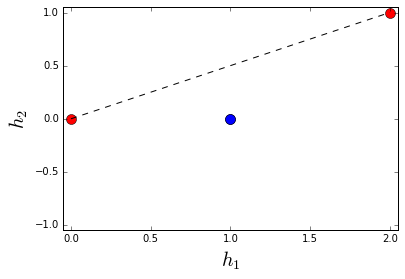

In [29]:
 # Apply activation function to 'h'
h_ = np.maximum(h, 0)

# Plot transformed points
plt.plot(h_[y==0,0], h_[y==0,1], 'ro', markersize=10)
plt.plot(h_[y==1,0], h_[y==1,1], 'o', markersize=10)

plt.xlim(h[:,0].min()-0.05, h[:,0].max()+0.05)
plt.ylim(h[:,1].min()-0.05, h[:,1].max()+0.05)

plt.xlabel('$h_1$', fontsize=20)
plt.ylabel('$h_2$', fontsize=20)

# Plot output layer hyperplane (i.e. w^T h + b = 0)
o = np.array([[-0*w[1]/w[0] - b[0], 0], [-1*w[1]/w[0] - b[0], 1]])
plt.plot(o[:,0], o[:,1], 'k--')

# Sigmoid + Squared Loss

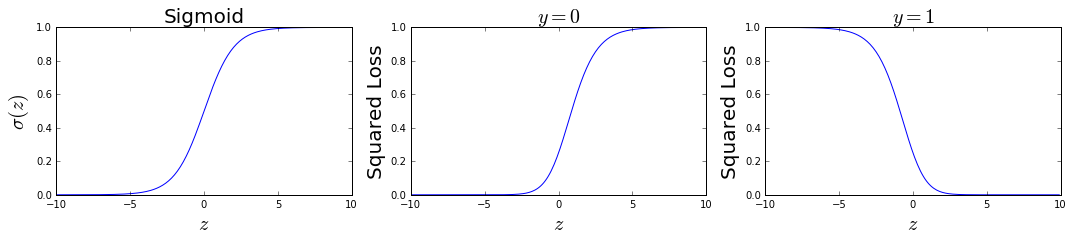

In [22]:
# Compute loss for values of z in range in -10 to 10
z = np.arange(-10, 10, 0.1)
sigz = 1/(1+np.exp(-z))
sqloss0 = (sigz)**2
sqloss1 = (1-sigz)**2

_,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,3))

ax1.plot(z, sigz)
ax1.set_xlabel('$z$', fontsize=20)
ax1.set_ylabel('$\sigma(z)$', fontsize=20)
ax1.set_title('Sigmoid', fontsize=20)

ax2.plot(z, sqloss0)
ax2.set_xlabel('$z$', fontsize=20)
ax2.set_ylabel('Squared Loss', fontsize=20)
ax2.set_title('$y=0$', fontsize=20)

ax3.plot(z, sqloss1)
ax3.set_xlabel('$z$', fontsize=20)
ax3.set_ylabel('Squared Loss', fontsize=20)
ax3.set_title('$y=1$', fontsize=20)

# Sigmoid + Cross-entropy Loss

(0, 5)

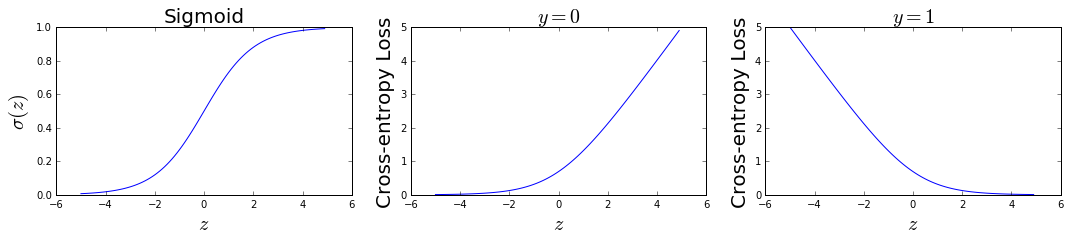

In [30]:
# Compute loss for values of z in range in -5 to 5
z = np.arange(-5, 5, 0.1)
sigz = 1/(1+np.exp(-z))
sqloss0 = -np.log(1-sigz)
sqloss1 = -np.log(sigz)

_,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,3))

ax1.plot(z, sigz)
ax1.set_xlabel('$z$', fontsize=20)
ax1.set_ylabel('$\sigma(z)$', fontsize=20)
ax1.set_title('Sigmoid', fontsize=20)

ax2.plot(z, sqloss0)
ax2.set_xlabel('$z$', fontsize=20)
ax2.set_ylabel('Cross-entropy Loss', fontsize=20)
ax2.set_title('$y=0$', fontsize=20)

ax3.plot(z, sqloss1)
ax3.set_xlabel('$z$', fontsize=20)
ax3.set_ylabel('Cross-entropy Loss', fontsize=20)
ax3.set_title('$y=1$', fontsize=20)
ax3.set_ylim([0,5])

# Exponential Gain with Depth

Consider the following feedforward network with $n$ hidden layers:
$$\mathbf{h}_0 = \mathbf{x}$$
$$\mathbf{h}_i = \big|\,\mathbf{h}_{i-1} - t_i\,\big|,~ i = 1, \ldots, n$$
$$\mathbf{y} = \mathbf{w}^\top \mathbf{h}_n,$$
where each $\mathbf{x}, \mathbf{h}_0, \ldots, \mathbf{h}_n, \mathbf{w} \in \mathbb{R}^2$ and  $t_i = 2^{-i}$. Here each hidden layer can be seen as folding the space of activations into half along both th axes. 

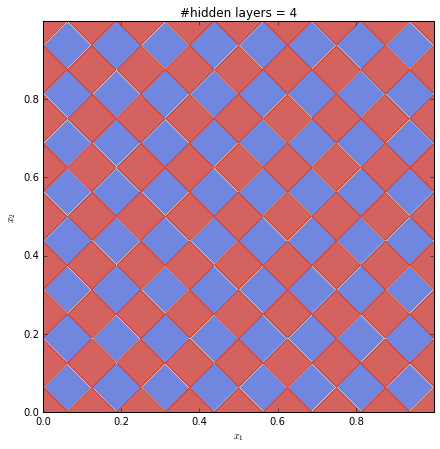

In [3]:
# Function to implement neural net
def fold_net(num_hidden, x):
    # Compute hidden layers: each layer folds the input along both axes
    fold_thresh = 0.5
    for i in range(num_hidden):
        x = np.abs(x - fold_thresh) # Apply abs activation at threshold
        fold_thresh = fold_thresh / 2 # Halve the threshold
    
    # Final layer is a hyperplane
    w = np.array([1,1])
    b = -fold_thresh*2
    y = np.dot(x, w) + b
    
    return np.sign(y)

# Function to plot neural net decision boundary
def plot_nnet(num_hidden):
    _,(fig) = plt.subplots(1,1,figsize=(7, 7))
    plot_decision_boundary(np.array([[0,0], [1,1]]), None, partial(fold_net,num_hidden),\
                                                   '#hidden layers = ' + str(num_hidden), fig)

# Add slider control for #hidden-layers
interact(plot_nnet, num_hidden=(0,9))

### SVM with RBF kernel for same pattern

<function __main__.plot_svm>

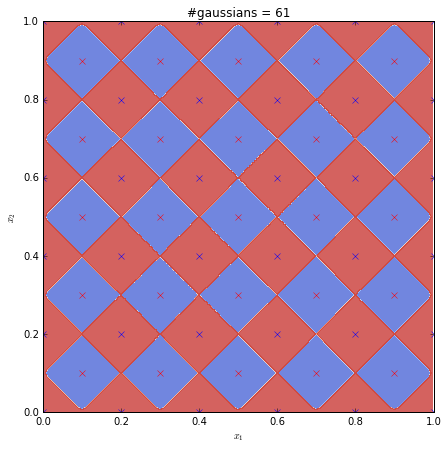

In [5]:
# Function to implement RBF SVM
def fold_svm(num_gaussians_per_axis, x):
    n = x.shape[0]
    sc = np.zeros((n,))
    
    num_gaussians_per_axis = num_gaussians_per_axis*2
                                 
    yi = 1
    
    # Compute: f(x) = \sum_i y_i K(x_i, x), where K is RBF kernel \exp(-||x-x_i||^2 / 2\sigma^2),
    #                                       x_i is kernel center, \sigma is the kernel width parameter
    # For n Gaussians per axis, we use centers: [1.0/n, j * 1.0/n], i = 1...n, j = 1...n, \sigma = 1 / n / 3 
    #                                                                   (so that the 3 SD = 1/n -- required radius)
    for i in range(0, num_gaussians_per_axis+1):
        yj = -1
        
        for j in range(0, num_gaussians_per_axis+1):
            if((i + j) % 2 == 1):
                continue
                
            center = np.array([i * 1.0/num_gaussians_per_axis, j * 1.0/num_gaussians_per_axis]).reshape(1,2)
            
            if(yi>0):
                plt.plot(center[:,0],center[:,1], 'bx')
            else:
                plt.plot(center[:,0],center[:,1], 'rx')
            
            dif = x - np.repeat(center, n, axis=0)
            pdf = np.exp(-np.sum(dif * dif * num_gaussians_per_axis * num_gaussians_per_axis * 9.0/2.0, axis=1))
                        
            sc = sc +  pdf * yi 
            
            yj = yj * -1
            
        yi = yi * -1
    
    return np.sign(sc)

# Function to plot SVM decision boundary
def plot_svm(num_gaussians_per_axis):
    _,(fig) = plt.subplots(1,1,figsize=(7, 7))
    num_gaussians = 2*num_gaussians_per_axis*num_gaussians_per_axis + 2*num_gaussians_per_axis + 1
    plot_decision_boundary(np.array([[0,0], [1,1]]), None, partial(fold_svm,num_gaussians_per_axis),\
                                                   '#gaussians = ' + str(num_gaussians), fig)

# Add slider control for #gaussians_per_axis
interact(plot_svm, num_gaussians_per_axis=(0,10))